In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('master_updated_stats.csv')

In [6]:
set(tuple(r) for r in df[['features', 'split_depth']].dropna().values)

{('split_clone_keep_splits_stats', 1),
 ('split_clone_keep_splits_stats', 2),
 ('split_clone_keep_splits_stats', 3),
 ('split_clone_keep_splits_stats', 4),
 ('split_clone_stats', 1),
 ('split_clone_stats', 2),
 ('split_clone_stats', 3),
 ('split_clone_stats', 4),
 ('split_colored_stats', 1),
 ('split_colored_stats', 2),
 ('split_colored_stats', 3),
 ('split_colored_stats', 4),
 ('split_no_cmemo_stats', 1),
 ('split_no_cmemo_stats', 2),
 ('split_no_cmemo_stats', 3),
 ('split_no_cmemo_stats', 4),
 ('split_no_cremove_stats', 1),
 ('split_no_cremove_stats', 2),
 ('split_no_cremove_stats', 3),
 ('split_no_cremove_stats', 4)}

In [7]:
row_labels = set(df['relative_path'])

In [32]:
xr = [df[df['relative_path'] == rl] for rl in row_labels][0][['features', 'split_depth', 'total_enodes']]

In [137]:
pt = pd.pivot_table(df, index=['relative_path', 'split_depth'], columns=['features'], values='total_enodes')
#pt = pt.query("features in ['split_colored_stats', 'split_clone_keep_splits_stats']")

In [138]:
pt.to_csv('pivot.csv')

In [168]:
if 0:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(pt['split_clone_keep_splits_stats'], pt['split_colored_stats'], s=1)
    ax.set_xscale('log'); ax.set_yscale('log')

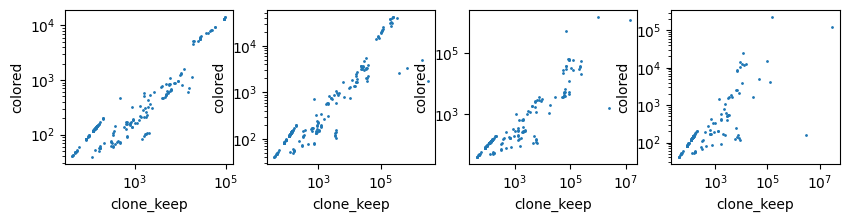

In [166]:
import matplotlib.pyplot as plt

def scatter1(df, fig=None, ax=None):
    pt = pd.pivot_table(df, index=['relative_path', 'split_depth'],
                        columns=['features'], values='total_enodes')

    if not ax:
        fig = fig or plt.figure()
        ax = fig.add_axes([0,0,1,1])
    
    ax.scatter(pt['split_clone_keep_splits_stats'], pt['split_colored_stats'], s=1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('clone_keep')
    ax.set_ylabel('colored')
    return ax

fig, axes = plt.subplots(1, 4, figsize=(10,2))

for i in [1,2,3,4]:
    scatter1(df[df['split_depth'] == i], ax=axes[i-1])

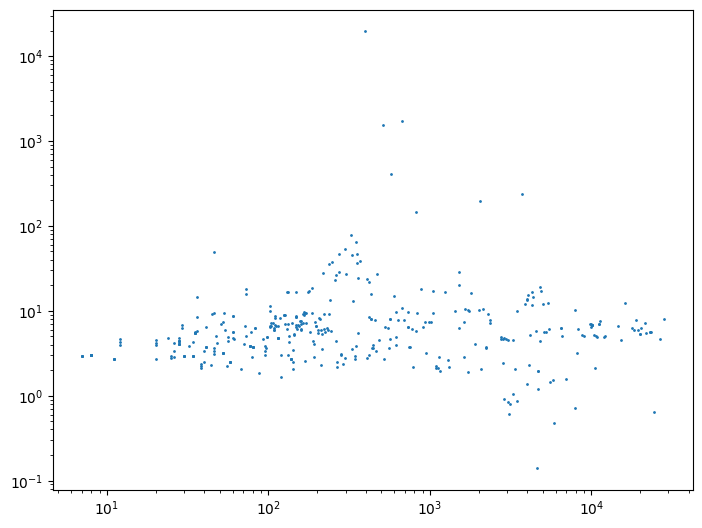

In [169]:
x_col = ['num_splits', 'colored_unions_count'][1]
y_col = ['eclasses_count', 'total_enodes'][1]

cfg1, cfg2 = 'split_colored_stats', 'split_clone_keep_splits_stats'

pt = pd.pivot_table(df, index=['relative_path', 'split_depth'],
                        columns=['features'], values=[x_col, y_col])
pt = pt[pt[x_col][cfg1] > 0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(pt[x_col][cfg1], pt[y_col][cfg2] / pt[y_col][cfg1], s=1)
ax.set_xscale('log'); 
ax.set_yscale('log')

(array([2.39e+03, 5.30e+01, 2.15e+02, 3.27e+02, 1.99e+02, 1.58e+02,
        1.08e+02, 4.20e+01, 1.00e+00, 4.00e+00]),
 array([ 0.        ,  1.43875449,  2.87750898,  4.31626347,  5.75501797,
         7.19377246,  8.63252695, 10.07128144, 11.51003593, 12.94879042,
        14.38754492]),
 <BarContainer object of 10 artists>)

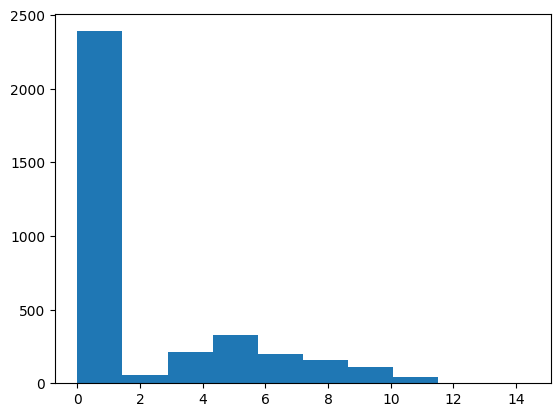

In [132]:
import math
plt.hist(df['colored_unions_count'].dropna().apply(lambda x: math.log(x) if x > 0 else 0))